In [75]:
library("dplyr")

In [76]:
rawData = read.table("Table5.11.txt", header=TRUE, sep='\t')

In [77]:
head(rawData)

,Quarter,Date,Sales,PDI
,<int>,<dbl>,<dbl>,<dbl>
1,1,64,37.0,109
2,2,64,33.5,115
3,3,64,30.8,113
4,4,64,37.9,116
5,1,65,37.4,118
6,2,65,31.6,120


In [78]:
theData <- rawData %>%
    mutate(q1 = 1 * (Quarter == 1),
           q2 = 1 * (Quarter == 2),
           q3 = 1 * (Quarter == 3),
           q4 = 1 * (Quarter == 4),
           w = 1 * (Quarter == 4 | Quarter == 1),
           s = 1 * (Quarter == 2 | Quarter == 3),
           year = Date)

In [79]:
head(theData)

,Quarter,Date,Sales,PDI,q1,q2,q3,q4,w,s,year
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,64,37.0,109,1,0,0,0,1,0,64
2,2,64,33.5,115,0,1,0,0,0,1,64
3,3,64,30.8,113,0,0,1,0,0,1,64
4,4,64,37.9,116,0,0,0,1,1,0,64
5,1,65,37.4,118,1,0,0,0,1,0,65
6,2,65,31.6,120,0,1,0,0,0,1,65


In [80]:
lmfit <- lm(Sales ~ q1 + q2 + q3 + PDI + year , data = theData)

In [81]:
lmfit2 <- lm(Sales ~ w + PDI + year, data = theData)

In [82]:
summary(lmfit)


Call:
lm(formula = Sales ~ q1 + q2 + q3 + PDI + year, data = theData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39593 -0.82911  0.01367  0.71883  2.53010 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.90562   36.79196  -0.677    0.503    
q1           -0.16463    0.70781  -0.233    0.817    
q2           -5.57146    0.58344  -9.549 3.75e-11 ***
q3           -5.45030    0.53889 -10.114 8.72e-12 ***
PDI           0.12713    0.06694   1.899    0.066 .  
year          0.74615    0.69160   1.079    0.288    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.159 on 34 degrees of freedom
Multiple R-squared:  0.9737,	Adjusted R-squared:  0.9698 
F-statistic: 251.8 on 5 and 34 DF,  p-value: < 2.2e-16


In [83]:
summary(lmfit2)


Call:
lm(formula = Sales ~ w + PDI + year, data = theData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36790 -0.85939 -0.00198  0.71528  2.60341 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.72168   26.16019  -0.907  0.37055    
w             5.43467    0.35747  15.203  < 2e-16 ***
PDI           0.13933    0.04703   2.963  0.00538 ** 
year          0.62065    0.48780   1.272  0.21141    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.128 on 36 degrees of freedom
Multiple R-squared:  0.9736,	Adjusted R-squared:  0.9714 
F-statistic: 443.1 on 3 and 36 DF,  p-value: < 2.2e-16


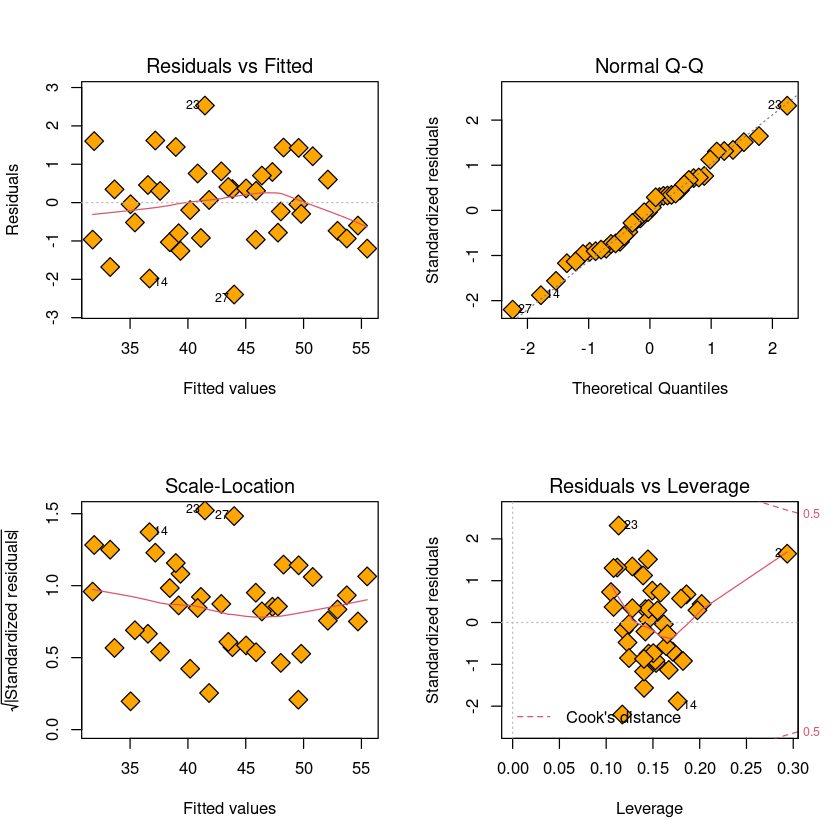

In [84]:
par(mfrow=c(2,2))
plot(lmfit, pch=23 ,bg='orange',cex=2)

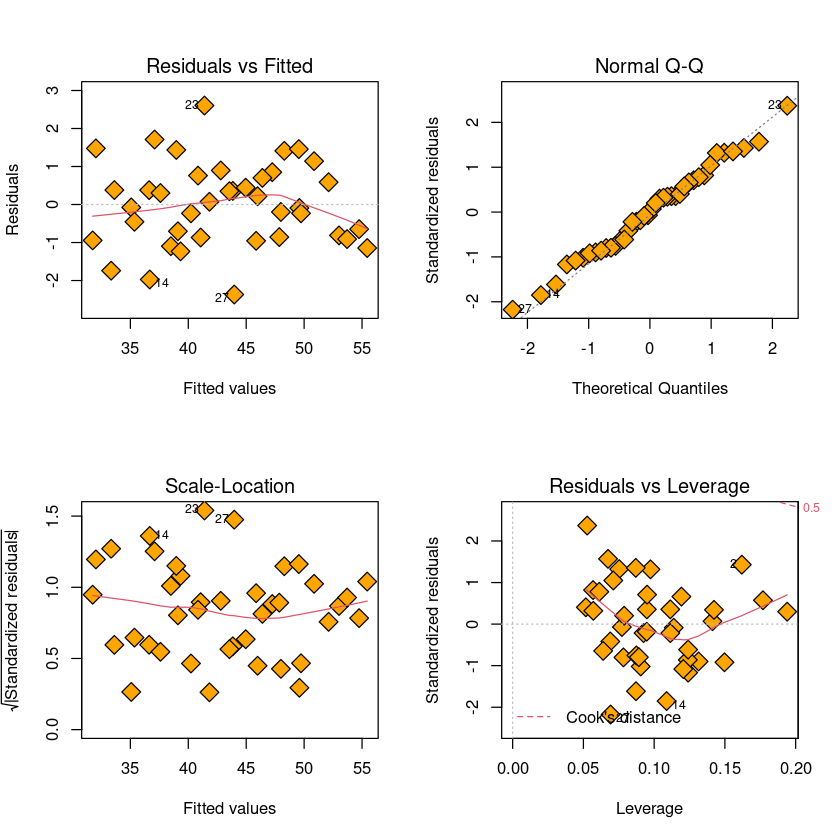

In [85]:
par(mfrow=c(2,2))
plot(lmfit2, pch=23 ,bg='orange',cex=2)

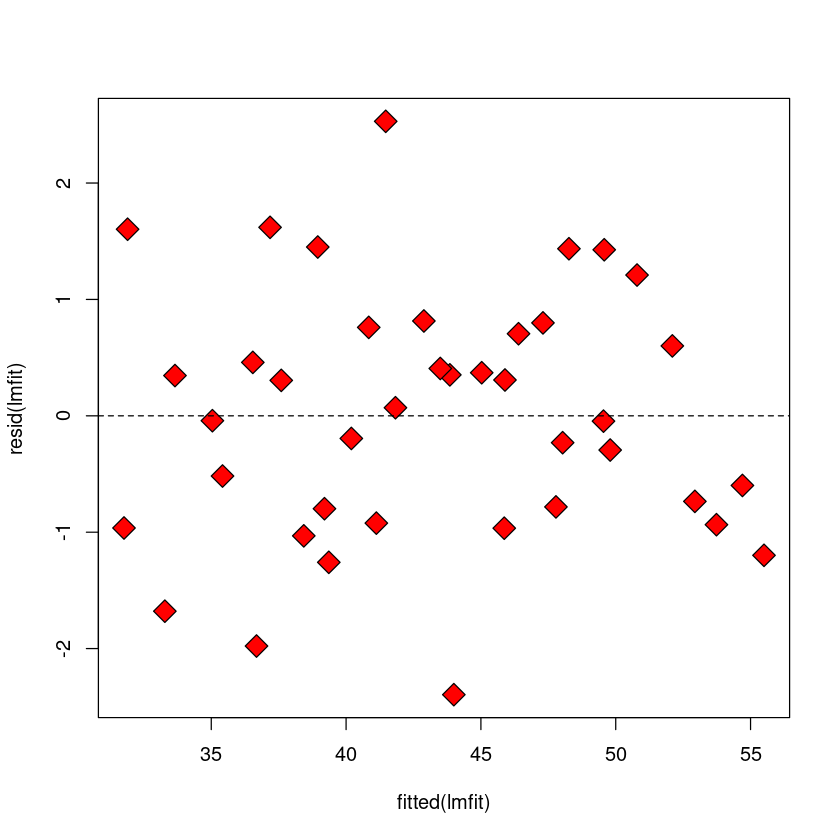

In [86]:
plot(fitted(lmfit), resid(lmfit), pch=23, bg='red', cex=2)
abline(h=0, lty=2)

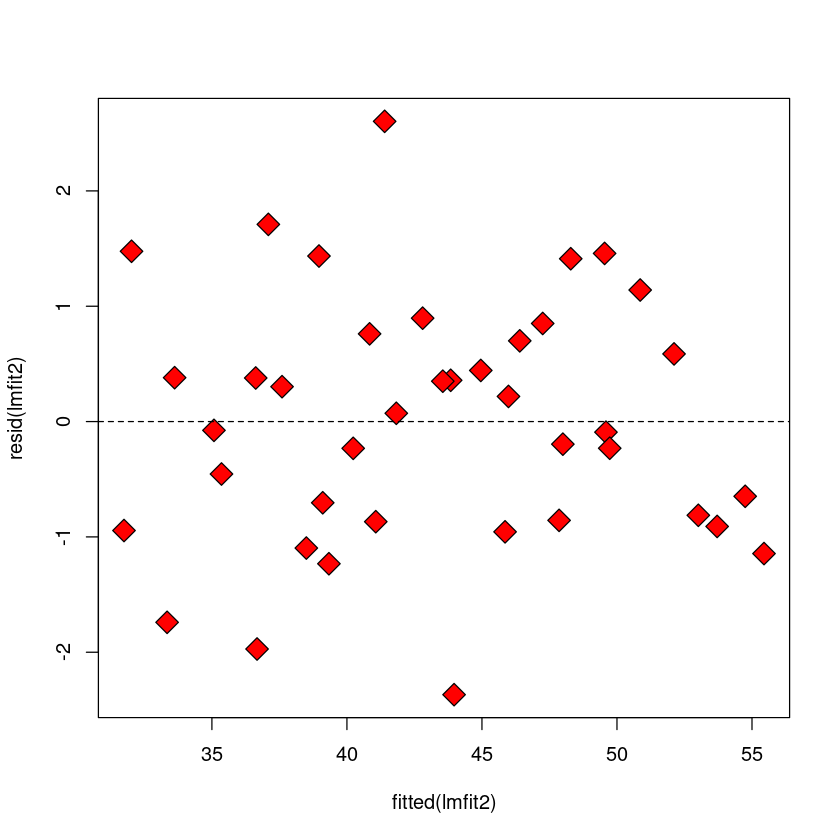

In [87]:
plot(fitted(lmfit2), resid(lmfit2), pch=23, bg='red', cex=2)
abline(h=0, lty=2)

Using the additional seasonal variable, the model is expanded to be
$$
S_{t}=\beta_{0}+\beta_{1} \mathrm{PDI}_{t}+\beta_{2} Z_{t}+\varepsilon_{t}
$$
where $Z_{t}$ is the zero-one variable described above and $\beta_{2}$ is a parameter that measures the seasonal effect. Note that the model above can be represented by the two models (one for the cold weather quarters where $Z_{t}=1$ ) and the other for the warm quarters where $Z_{t}=0$ ):

Winter season: 
$$
\quad S_{t}=\left(\beta_{0}+\beta_{2}\right)+\beta_{1} \mathrm{PDI}_{t}+\varepsilon_{t}
$$ 
Summer season: 
$$ 
S_{t}=\beta_{0}+\beta_{1} \mathrm{PDI}_{t}+\varepsilon_{t}
$$
Thus, the model represents the assumption that sales can be approximated by a linear function of PDI, in one line for the winter season and one for the summer season. The lines are parallel; that is, the marginal effect of changes in PDI is the same in both seasons. The level of sales, as reflected by the intercept, is different in each season.

The regression results are summarized in Table above and the index plot of the standardized residuals is shown in Figure above. We see that all indications of the seasonal pattern have been removed. Furthermore, the precision of the estimated marginal effect of PDI increased. The confidence interval is now $(\$ 186,520,$, $\$ 210,880$ ). Also, the seasonal effect has been quantified and we can say that for a fixed level of PDI the winter season brings between $\$ 4,734,109$ and $\$ 6,194,491$ over the summer season (with $95 \%$ confidence).